In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

# MNIST tutorial (Exercise1~Exercise11)
## Exercise(1) - Processing MNIST data

In [2]:
import pickle
import pandas as pd

print('... loading data')
with open('data/mnist.pkl', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

... loading data


In [3]:
train_x, train_y = train_set
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns = ['label'])
test_x =  pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns = ['label'])

train_data = pd.concat([train_x, train_y], axis=1)
test_data = pd.concat([test_x, test_y], axis=1)

print(train_data.shape, test_data.shape)

(50000, 785) (10000, 785)


## PCA

### Ex4 calculate cov. eigen value/vector

In [4]:
train_x = train_data.iloc[:, :-1]
train_y = train_data.iloc[:, -1]

cov_matrix = np.cov(train_x.T) # [sample  x Pixel] => [Picxel x sample] => [Picxel x Picxel]
eig_val, eig_vec = np.linalg.eig(cov_matrix) # eig_vec: column vector

eig_vec = eig_vec.T # column vectors => row vectors
print('20 eigen values of 784 eigen values: \n', eig_val[:20])
print('val:', eig_val.shape)
print('vec:', eig_vec.shape)

20 eigen values of 784 eigen values: 
 [5.10829281 3.70097988 3.25867822 2.82008442 2.54673474 2.26446711
 1.71820047 1.51312696 1.45150445 1.24028893 1.10062981 1.05915625
 0.89946813 0.88164617 0.82789811 0.78254504 0.69102204 0.66920675
 0.62200547 0.60339874]
val: (784,)
vec: (784, 784)


## Ex5 visualize eigen vectors

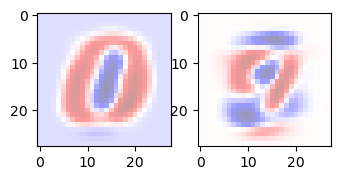

In [5]:
import matplotlib.pyplot as plt
import numpy as np

## Choose 2 vectors
good_vecs = eig_vec[:2] # check its shapse is [2 x 784]

plt.figure(figsize=(10,5))
for i, vec in enumerate(good_vecs):
    vec = vec.reshape((28,28))
    ax = plt.subplot(2,5, i+1)
    fig = plt.imshow(vec, alpha=0.4, cmap='seismic')

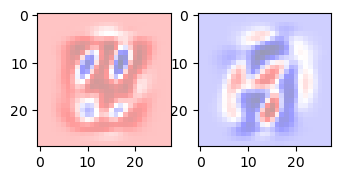

In [6]:
bad_vecs = eig_vec[10:12]

plt.figure(figsize=(10,5))
for i, vec in enumerate(bad_vecs):
    vec = vec.reshape((28,28))
    ax = plt.subplot(2,5, i+1)
    fig = plt.imshow(vec, alpha=0.4, cmap='seismic')

## ex 6 - project data onto PCA planes (0.1p)

In [7]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [8]:
projected_x = train_x.dot(eig_vec[0:2].T).to_numpy()
print("new data points' shape: ", train_x.shape, eig_vec[0:2].T.shape, "=", projected_x.shape)
print("projected_x.shape: ", projected_x.shape, " train_y.shape: ", train_y.shape)

new data points' shape:  (50000, 784) (784, 2) = (50000, 2)
projected_x.shape:  (50000, 2)  train_y.shape:  (50000,)


In [9]:
new_coordinates = np.vstack((projected_x.T, train_y)).T
dataframe = pd.DataFrame(data=new_coordinates, columns = ("1st_pca", "2nd_pca", "label"))
dataframe.head(3)

,1st_pca,2nd_pca,label
0,3.466855,-1.348822,5.0
1,6.926997,-1.353609,0.0
2,2.801635,1.445926,4.0


## ex 7 - Visualize 2-dim MNIST data (0.2p)

Text(0, 0.5, 'Principal Component 2')

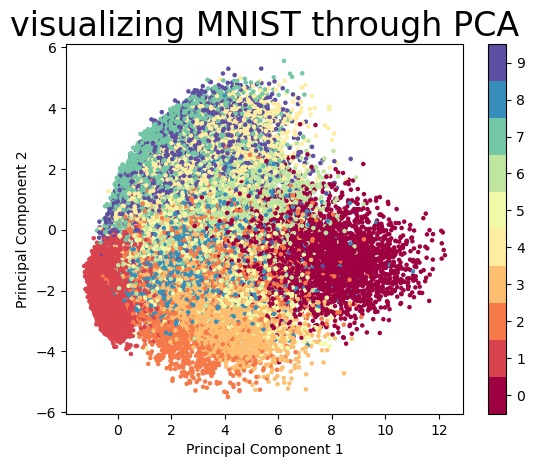

In [10]:
plt.scatter(projected_x[:,0], projected_x[:,1]  , s=5, c=train_y, cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('visualizing MNIST through PCA', fontsize = 24)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

## ex 8 - Clustering & Visualization (0.2p)

Text(0, 0.5, 'Principal Component 2')

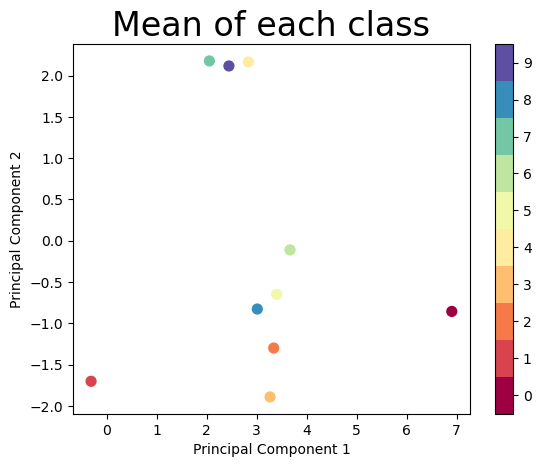

In [11]:
avg_point = []
X = []
Y = []

## calculate each label's mean value
for i in range(0, 10):
    mean_data = projected_x[train_data['label']==i].mean(axis=0)
    X.append(mean_data[0])
    Y.append(mean_data[1])

plt.scatter(X, Y, s=50, c=[0,1,2,3,4,5,6,7,8,9], cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('Mean of each class', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


In [12]:
di = {'x':X, 'y':Y}
avg_point_df = pd.DataFrame(di, columns=['x', 'y'])

avg_point_df

,x,y
0,6.905061,-0.855276
1,-0.311792,-1.701008
2,3.342736,-1.298553
3,3.269754,-1.890416
4,2.836307,2.165313
5,3.400326,-0.649264
6,3.668817,-0.110837
7,2.055240,2.177586
8,3.013611,-0.826211
9,2.445987,2.116579


## ex 9  - Clustering & Visualization (0.5p)
*** If the code is written correctly, the output should exactly match the results presented in the PPT.

In [13]:
# Check test data
from math import *
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

test_x, test_y = test_set        # test_set에 포함된 (입력, 레이블) 쌍을 test_x와 test_y로 분리
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns=['label'])

projected_test_x = test_x.dot(eig_vec[0:2].T).to_numpy()   # test_x 데이터를 PCA의 주성분 1, 2 방향으로 투영
principal_df =pd.DataFrame(data=projected_test_x, columns=['PC 1', 'PC 2'])    # 넘파이 배열 projected_test_x를 데이터프레임으로 변환하고, 열 이름을 'PC 1', 'PC 2'로 설정

## Test data's PCA : test_x, test_y
print('test data\'s shape:',test_x.shape, test_y.shape)

pred_label = []
print(projected_test_x.shape, test_y.shape)
for i, (x, y) in enumerate(zip(projected_test_x, test_y.squeeze())):
    ## calculate uclidean distance
    distance = [euclidean_distance(x, [avg_x, avg_y]) for (avg_x, avg_y) in zip(X, Y)]

    """
    test 샘플의 투영값 x, y와 가장 가까운 점 X, Y에 해당하는 레이블(=예측한 레이블)을 획득 .
    예측한 레이블을 pred_label 리스트에 순서대로 저장
    """
    pred_label.append(np.argmin(distance))
    

print('pred_label length: ', len(pred_label))

test data's shape: (10000, 784) (10000, 1)
(10000, 2) (10000, 1)
pred_label length:  10000


In [14]:
principal_df['pred_label'] = pred_label
principal_df['label'] = test_y

principal_df.head()

,PC 1,PC 2,pred_label,label
0,1.752303,2.798627,7,7
1,3.016745,-3.857681,3,2
2,-0.731315,-1.717984,1,1
3,7.836766,0.229712,0,0
4,3.765541,2.689341,4,4


Text(0, 0.5, 'PC 2')

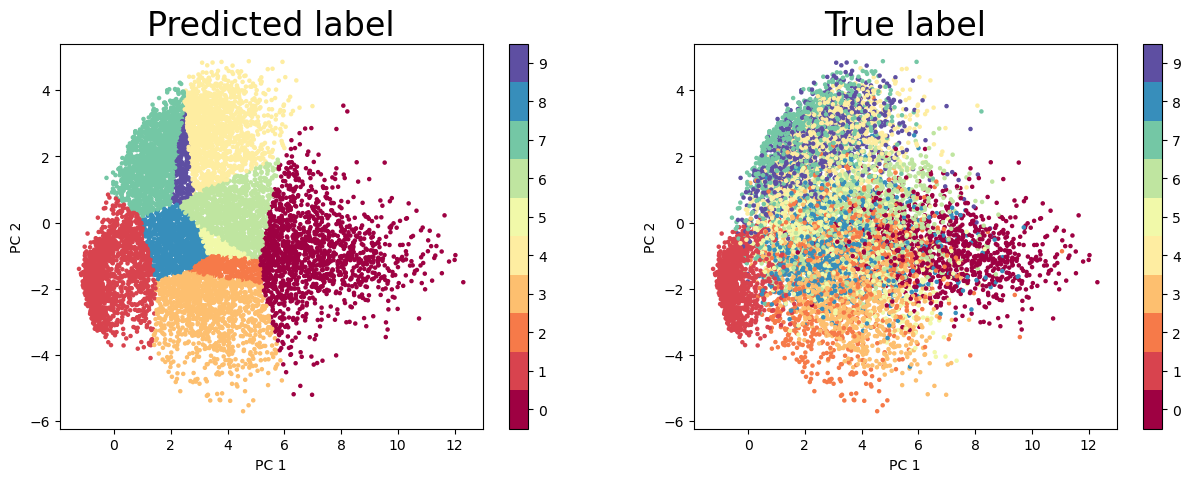

In [15]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
plt.scatter(principal_df['PC 1'], principal_df['PC 2'],c=principal_df['pred_label'], s= 5, cmap='Spectral')    # principal_df의 'PC 1'과 'PC 2'를 각각 x, y축으로 하여 산점도를 그리고, 점 색깔은 예측한 레이블에 따라 설정
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Predicted label', fontsize=24);

# xlabel, ylabel 추가
plt.xlabel("PC 1")
plt.ylabel("PC 2")


plt.subplot(1,2,2)
plt.scatter(principal_df['PC 1'], principal_df['PC 2'], c=principal_df['label'], s= 5, cmap='Spectral') # principal_df의 'PC 1'과 'PC 2'를 각각 x, y축으로 하여 산점도를 그리고, 점 색깔은 실제 레이블에 따라 설정
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('True label', fontsize=24);

# xlabel, ylabel 추가
plt.xlabel("PC 1")
plt.ylabel("PC 2")

In [16]:
acc = (principal_df['pred_label'] == principal_df['label'].squeeze()).mean()  # 예측 정확도 계산
print('\n Total accuracy on Test data is {:.4f}'.format(acc))
print('---------------------------------------------')
print(principal_df)


 Total accuracy on Test data is 0.4348
---------------------------------------------
          PC 1      PC 2  pred_label  label
0     1.752303  2.798627           7      7
1     3.016745 -3.857681           3      2
2    -0.731315 -1.717984           1      1
3     7.836766  0.229712           0      0
4     3.765541  2.689341           4      4
...        ...       ...         ...    ...
9995  4.165988 -2.221928           3      2
9996  5.197934 -2.853791           3      3
9997  2.032374  2.269081           7      4
9998  1.792168 -0.512353           8      5
9999  7.068762 -0.509858           0      6

[10000 rows x 4 columns]


## ex 10 - Explained variance (0.3p)

    eig_val   nor_val  explained_variance
0  5.108293  0.097444            0.097444
1  3.700980  0.070598            0.168042
2  3.258678  0.062161            0.230204
3  2.820084  0.053795            0.283999
4  2.546735  0.048581            0.332579


Text(0.5, 1.0, 'explained_variances')

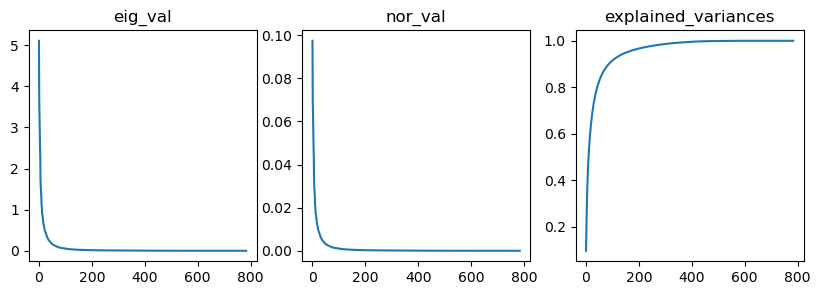

In [17]:
nor_val = [] # Normalized eigen values
explained_variances = [] # explained_variances: accumulated eigen value's proportion
sums = np.sum(eig_val)

for i, v in enumerate(eig_val):
    nor_val.append(v / sums)
    explained_variances.append(sum(nor_val))

dic = {'eig_val': eig_val, 'nor_val':nor_val, 'explained_variance':explained_variances}
ev = pd.DataFrame(dic)
print(ev.head())

plt.figure(figsize=(10,3))
plt.subplot(1,3,1); plt.plot(eig_val); plt.title("eig_val")
plt.subplot(1,3,2); plt.plot(nor_val); plt.title("nor_val")
plt.subplot(1,3,3); plt.plot(explained_variances); plt.title("explained_variances")

In [18]:
# Find the dimension when the 'explained variance ratio' is 95%

expvar_threshold = 0.95

"your codes here"

print('784 dim(pixel): {:.4f}% is explained in 784-dim.'.format(explained_variances[784-1]*100))
print('329 dim(pixel): {:.4f}% is explained in 329-dim.'.format(explained_variances[329-1]*100))
print('2 dim(pixel): {:.4f}% is explained in 2-dim.'.format(explained_variances[2-1]*100))

784 dim(pixel): 100.0000% is explained in 784-dim.
329 dim(pixel): 98.9772% is explained in 329-dim.
2 dim(pixel): 16.8042% is explained in 2-dim.


## ex 11 -Image reconstruction (0.2p)

In [19]:
from sklearn.decomposition import PCA
eig_dim = [2, 5, 10]

for d in eig_dim:
    eig_train_data = PCA(n_components=d).fit_transform(train_x)
    print(f"dim: {d}, data\'s shape: {eig_train_data.shape}")

dim: 2, data's shape: (50000, 2)
dim: 5, data's shape: (50000, 5)
dim: 10, data's shape: (50000, 10)


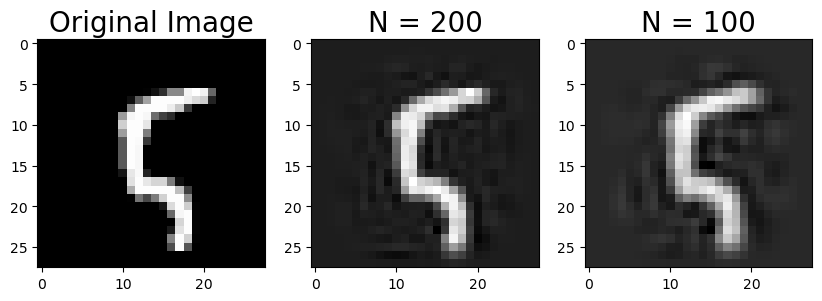

In [20]:
plt.figure(figsize=(10, 5));

# Original image
plt.subplot(1, 3, 1);
plt.imshow(train_x.iloc[100, :].values.reshape(28,28), cmap = 'gray')
plt.title('Original Image', fontsize = 20);

# Image reconstruction from PCA data
pca = PCA(n_components = 200); eig_train_data = pca.fit_transform(train_x)
approximation = pca.inverse_transform(eig_train_data)
plt.subplot(1, 3, 2);
plt.imshow(approximation[100, :].reshape(28, 28), cmap = 'gray')
plt.title('N = 200', fontsize = 20);

pca = PCA(n_components = 100); eig_train_data = pca.fit_transform(train_x)
approximation = pca.inverse_transform(eig_train_data)
plt.subplot(1, 3, 3);
plt.imshow(approximation[100, :].reshape(28, 28), cmap = 'gray')
plt.title('N = 100', fontsize = 20);